In [105]:
!pwd

/Users/shihosato/src/github.com/twinkle13531/master_degree/202011/4ti2/16bit


In [186]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [107]:
def make_result_list(mat_path):
    with open(mat_path) as f:
        l_strip = [[s.strip()] for s in f.readlines()]
        result_num = int(l_strip[0][0][:-(2+1)])
        result_list = []
        for i in range(1, result_num+1):
            int_y = [int(l_strip[i][0].split()[j]) for j in range(len(l_strip[i][0].split()))]
            result_list.append(int_y)
    return result_list

## 1. 順番にresult_listを一つずつ試していく、毎回ori_yを初期値とする

In [108]:
def calculate_energy(df, y):
    series_y = pd.Series(y)
    E_dot = (sum(y) - sum(df['Y']))**2 
    + (np.dot(series_y, df['SEX']) - np.dot(df['Y'], df['SEX']))**2 
    + (np.dot(series_y, df['AOP']) - np.dot(df['Y'], df['AOP']))**2
    
    E_num = sum([0 if each_y==1 or each_y ==0 else 1 for each_y in y])
    
    return E_dot + E_num

In [109]:
def make_samples1(mat_path, df):
    ori_y = list(df['Y'])
    result_list = make_result_list(mat_path)
    valid_y = [ori_y]
    print(valid_y)
    for each_list in result_list:
        canditate_y = [x + y for (x, y) in zip(ori_y, each_list)]
        print('here1:', canditate_y, len(valid_y))
        while calculate_energy(df, canditate_y)==0 and all(canditate_y != pp for pp in valid_y): 
                valid_y.append(canditate_y)
                print('here2:', canditate_y, len(valid_y))
                canditate_y = [x + y for (x, y) in zip(canditate_y, each_list)]
                print('here3:', canditate_y, len(valid_y))
            
        else:
            canditate_y = [x - 2*y for (x, y) in zip(canditate_y, each_list)]
            print('here4:', canditate_y, len(valid_y))
            while calculate_energy(df, canditate_y)==0 and all(canditate_y != pp for pp in valid_y):
                    valid_y.append(canditate_y)
                    print('here5:', canditate_y, len(valid_y))
                    canditate_y = [x - y for (x, y) in zip(canditate_y, each_list)]
                    print('here6:', canditate_y, len(valid_y))
               
            else:
                print('here7')
                continue
            print('here8')
            continue
                
    print('finish')
        
    return valid_y

In [110]:
df = pd.read_csv('../../input/ost16.csv', sep=',', index_col=0)
mat_path = '16bit.mat.mar'
valid_y = make_samples1(mat_path, df)

[[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]]
here1: [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0] 1
here4: [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2] 1
here7
here1: [1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1] 1
here4: [1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1] 1
here7
here1: [1, 1, 2, 1, -1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1] 1
here4: [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1] 1
here5: [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1] 2
here6: [1, 1, -1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1] 2
here7
here1: [1, 1, 2, 1, 0, -1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1] 2
here4: [1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1] 2
here5: [1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1] 3
here6: [1, 1, -1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1] 3
here7
here1: [1, 1, 2, 1, 0, 0, 1, 0, -1, 0, 1, 0, 0, 1, 0, 1] 3
here4: [1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1] 3
here5: [1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1] 4
here6: [1, 1, -1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1,

In [111]:
valid_y

[[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1],
 [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1],
 [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1]]

In [112]:
len(valid_y)

9

## 2. 順番にresult_listを一つずつ試していく, canditate_yは常に初期値ori_yに戻さない

In [115]:
def make_samples2(mat_path, df):
    ori_y = list(df['Y'])
    result_list = make_result_list(mat_path)
    valid_y = [ori_y]
    canditate_y  = ori_y
    print(valid_y)
    for each_list in result_list:
        canditate_y = [x + y for (x, y) in zip(canditate_y, each_list)]
        print('here1:', canditate_y, len(valid_y))
        while calculate_energy(df, canditate_y)==0 and all(canditate_y != pp for pp in valid_y): 
                valid_y.append(canditate_y)
                print('here2:', canditate_y, len(valid_y))
                canditate_y = [x + y for (x, y) in zip(canditate_y, each_list)]
                print('here3:', canditate_y, len(valid_y))
            
        else:
            canditate_y = [x - 2*y for (x, y) in zip(canditate_y, each_list)]
            print('here4:', canditate_y, len(valid_y))
            while calculate_energy(df, canditate_y)==0 and all(canditate_y != pp for pp in valid_y):
                    valid_y.append(canditate_y)
                    print('here5:', canditate_y, len(valid_y))
                    canditate_y = [x - y for (x, y) in zip(canditate_y, each_list)]
                    print('here6:', canditate_y, len(valid_y))
               
            else:
                print('here7')
                continue
            print('here8')
            continue
                
    print('finish')
        
    return valid_y

In [116]:
df = pd.read_csv('../../input/ost16.csv', sep=',', index_col=0)
mat_path = '16bit.mat.mar'
valid_y = make_samples2(mat_path, df)

[[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]]
here1: [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0] 1
here4: [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2] 1
here7
here1: [1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2] 1
here4: [1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2] 1
here7
here1: [1, 1, 1, 2, -1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2] 1
here4: [1, 1, -1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2] 1
here7
here1: [1, 1, 0, 2, 1, -1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2] 1
here4: [1, 1, -2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2] 1
here7
here1: [1, 1, -1, 2, 1, 1, 1, 0, -1, 0, 1, 0, 0, 0, 0, 2] 1
here4: [1, 1, -3, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2] 1
here7
here1: [1, 1, -2, 2, 1, 1, 1, 0, 1, 0, 1, -1, 0, 0, 0, 2] 1
here4: [1, 1, -4, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2] 1
here7
here1: [1, 1, -3, 2, 1, 1, 1, 0, 1, 0, 1, 1, -1, 0, 0, 2] 1
here4: [1, 1, -5, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2] 1
here7
here1: [1, 2, -5, 2, 1, 1, 1, -1, 1, 0, 1, 1, 1, 0, 0, 2] 1
here4: [1, 0, -5, 2, 1

In [118]:
valid_y

[[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]]

## 3. 順番にresult_listを一つずつ試していく, continue一個減らした
- 良くなかった

In [ ]:
#while all(p==0 or p==1 for p in canditate_y) and all(canditate_y != pp for pp in canditate_y_list): 

In [123]:
def make_samples3(mat_path, df):
    ori_y = list(df['Y'])
    result_list = make_result_list(mat_path)
    canditate_y_list = [ori_y]
    canditate_y = ori_y
    for each_list in result_list:
        canditate_y = [x + y for (x, y) in zip(canditate_y, each_list)]#do
        canditate_y_list.append(canditate_y)
        print('here1:', canditate_y, len(canditate_y_list))
        while calculate_energy(df, canditate_y)==0 and all(canditate_y != pp for pp in valid_y): 
                canditate_y_list.append(canditate_y)
                print('here2:', canditate_y, len(canditate_y_list))
                canditate_y = [x + y for (x, y) in zip(canditate_y, each_list)]
            
        else:
            canditate_y_list = canditate_y_list[:-1]#一つ消す
            canditate_y = canditate_y_list[-1]#一つ戻る
            canditate_y = [x - y for (x, y) in zip(canditate_y, each_list)]#do
            canditate_y_list.append(canditate_y)
            print('here3:', canditate_y, len(canditate_y_list))
            while calculate_energy(df, canditate_y)==0 and all(canditate_y != pp for pp in valid_y): 
                    canditate_y_list.append(canditate_y)
                    print('here4:', canditate_y, len(canditate_y_list))
                    canditate_y = [x - y for (x, y) in zip(canditate_y, each_list)]
               
            else:
                canditate_y_list = canditate_y_list[:-1]#一つ消す
                canditate_y = canditate_y_list[-1]#一つ戻る
                print('here5')
                continue
            print('here6')
            #continue
                
    print('finish')
        
    return canditate_y_list

In [124]:
df = pd.read_csv('../../input/ost16.csv', sep=',', index_col=0)
mat_path = '16bit.mat.mar'
valid_y = make_samples3(mat_path, df)

here1: [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0] 2
here3: [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2] 2
here5
here1: [1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1] 2
here3: [1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1] 2
here5
here1: [1, 1, 2, 1, -1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1] 2
here3: [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1] 2
here5
here1: [1, 1, 2, 1, 0, -1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1] 2
here3: [1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1] 2
here4: [1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1] 3
here5
here1: [1, 1, 1, 1, 0, 1, 1, 0, -1, 0, 1, 0, 0, 1, 0, 1] 3
here3: [1, 1, -1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1] 3
here5
here1: [1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, -1, 0, 1, 0, 1] 3
here3: [1, 1, -1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1] 3
here5
here1: [1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, -1, 1, 0, 1] 3
here3: [1, 1, -1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1] 3
here5
here1: [1, 2, 0, 1, 0, 1, 1, -1, 0, 0, 1, 0, 0, 1, 0, 1] 3
here3: [1, 0, 0, 1, 0

In [125]:
valid_y

[[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1],
 [0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1]]

In [126]:
len(valid_y)

6

## 4. random

In [128]:
def make_samples4(mat_path, df, num):
    ori_y = list(df['Y'])
    valid_y = [ori_y]
    
    result_list = make_result_list(mat_path)
    canditate_y = ori_y
    
    for _ in range(num):
        i = random.randrange(len(result_list))
        this_time_y = result_list[i]
        canditate_y = [x + y for (x, y) in zip(canditate_y, this_time_y)]
        print('here1:', canditate_y, len(valid_y))
        while calculate_energy(df, canditate_y)==0 and all(canditate_y != pp for pp in valid_y):
                valid_y.append(canditate_y)
                print('here2:', canditate_y, len(valid_y))
                canditate_y = [x + y for (x, y) in zip(canditate_y, this_time_y)]
                print('here3:', canditate_y, len(valid_y))

        else:
            canditate_y = [x - 2*y for (x, y) in zip(canditate_y, this_time_y)]
            print('here4:', canditate_y, len(valid_y))
            while calculate_energy(df, canditate_y)==0 and all(canditate_y != pp for pp in valid_y): 
                    valid_y.append(canditate_y)
                    print('here5:', canditate_y, len(valid_y))
                    canditate_y = [x - y for (x, y) in zip(canditate_y, this_time_y)]
                    print('here6:', canditate_y, len(valid_y))

            else:
                continue
                
    print('finish')
        
    return valid_y

In [129]:
df = pd.read_csv('../../input/ost16.csv', sep=',', index_col=0)
mat_path = '16bit.mat.mar'
valid_y = make_samples4(mat_path, df, 10)

here1: [1, 1, 2, 1, 0, 0, 1, 0, -1, 0, 1, 0, 0, 1, 0, 1] 1
here4: [1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1] 1
here5: [1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1] 2
here6: [1, 1, -1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1] 2
here1: [1, 1, -1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0] 2
here4: [1, 1, -1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2] 2
here1: [2, 1, -1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2] 2
here4: [0, 1, -1, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2] 2
here1: [0, 1, 0, 1, -1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2] 2
here4: [0, 1, -2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2] 2
here1: [0, 1, -1, 1, 1, -1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2] 2
here4: [0, 1, -3, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2] 2
here1: [1, 2, -4, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0, -1, 0, 2] 2
here4: [-1, 0, -2, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 0, 2] 2
here1: [-1, 1, -2, 1, 1, 1, 2, 0, 2, -1, 1, 0, 0, 1, 0, 2] 2
here4: [-1, -1, -2, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 2] 2
here1: [-1, -1, -1, 1, 1, 1, 2, 0, 2, 1, 1, -1, 0, 

In [130]:
valid_y

[[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1]]

## 5. モンテカルロ

## 6. MCMC ⊃ 拡張アンサンブル法（交換モンテカルロ）

In [131]:
def make_canditate_y(result_list, canditate_y):
    i = random.randrange(len(result_list))
    this_time_y = result_list[i]
    j = random.randrange(2)
    if j==1:
        canditate_y = [x + y for (x, y) in zip(canditate_y, this_time_y)]
    else:
        canditate_y = [x - y for (x, y) in zip(canditate_y, this_time_y)]
        
    return canditate_y

In [132]:
def calculate_energy(df, y):
    series_y = pd.Series(y)
    E_dot = (sum(y) - sum(df['Y']))**2 
    + (np.dot(series_y, df['SEX']) - np.dot(df['Y'], df['SEX']))**2 
    + (np.dot(series_y, df['AOP']) - np.dot(df['Y'], df['AOP']))**2
    
    E_num = sum([0 if each_y==1 or each_y ==0 else 1 for each_y in y])
    
    return E_dot + E_num

In [172]:
def exchange_MonteCarlo(matmar_path, df, temp_num, MCMC_steps):
    result_list = make_result_list(matmar_path)
    
    temp_num = 10
    b_temps = [100/i for i in range(1, temp_num)]
    len_temp = temp_num - 1
    replicas = {i:[each_b_temp, list(df['Y'])] for i, each_b_temp in enumerate(b_temps)}
    E_dic = {i:[0] for i in range(len_temp)}#b_temp, y, energy
    valid_y_list = [list(df['Y'])]
    for num in range(MCMC_steps):
        
        for i in range(len_temp):
            replicas[i][1] = make_canditate_y(result_list, replicas[i][1])
            
        m = random.randrange(len_temp)
        n = random.randrange(len_temp)
        
        transition_p = 1#交換確率
        delta = (replicas[m][0] - replicas[n][0])*(calculate_energy(df, replicas[n][1]) - calculate_energy(df, replicas[m][1]))
        if delta > 0:
            transition_p = math.exp(-delta)#詳細釣り合い条件、交換確率
        
        R = np.random.uniform(0.0, 1.0)
        if R <= transition_p:#乱数と交換確率の比較
            y_m = replicas[m][1]
            y_n = replicas[n][1]
            
            replicas[m][1] = y_n
            replicas[n][1] = y_m
        
        for i in range(len_temp):
            this_time_E = calculate_energy(df, replicas[i][1])
            this_time_y = replicas[i][1]
            E_dic[i].append(this_time_E)
            if this_time_E==0 and all(this_time_y != pp for pp in valid_y):
                valid_y_list = [this_time_y]
                
    return replicas, E_dic, valid_y_list

In [201]:
def result_plot(E_dic, save_plot): 
    plt.xlabel('steps')
    plt.ylabel('energy')
    x = [i for i in range(len(E_dic[0]))]
    for e in E_dic.values():
        plt.plot(x, e)
    plt.savefig(save_plot)
    plt.show()
    return 0

In [202]:
df = pd.read_csv('../../input/ost16.csv', sep=',', index_col=0)
matmar_path = '16bit.mat.mar'
temp_num = 10
MCMC_steps = 100

In [203]:
replicas, E_dic, valid_y_list = exchange_MonteCarlo(matmar_path, df, temp_num, MCMC_steps)

In [182]:
replicas

{0: [100.0, [0, -3, -17, 1, 3, 4, 2, 1, 11, 4, 1, 0, -1, -1, 1, 2]],
 1: [50.0, [-1, -3, 1, 1, -2, 0, 1, 1, 0, 3, 1, 4, -2, 5, 2, -3]],
 2: [33.333333333333336,
  [8, 1, -3, 1, -1, 5, -4, 2, 6, -1, 0, 0, -6, 6, -2, -4]],
 3: [25.0, [-3, 2, 12, 0, 0, -1, 1, -1, 1, 2, -4, -1, -6, 6, 1, -1]],
 4: [20.0, [-5, -2, 3, 4, 0, 3, 4, 3, -2, -3, 0, -4, 2, 6, -1, 0]],
 5: [16.666666666666668,
  [4, 8, 3, -3, 1, 3, 3, -1, -2, -3, 0, 0, -2, -1, -3, 1]],
 6: [14.285714285714286,
  [6, 7, 1, -2, 1, -4, 2, 2, -4, -2, 0, -2, 7, -9, -1, 6]],
 7: [12.5, [-8, -8, 7, -1, 0, 2, 2, -2, -2, 2, 5, 0, 1, 10, 3, -3]],
 8: [11.11111111111111,
  [-6, 6, 8, 0, 2, -3, 2, -3, -4, -2, -1, 2, -1, 2, 4, 2]]}

In [198]:
valid_y_list

[[1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1]]

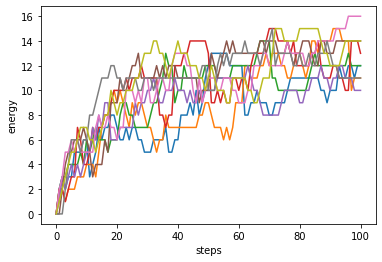

0

In [204]:
result_plot(E_dic, 'trial_16bit')